- **hrv, mbp, hr -> 0, 1, 2**
- **ep, e, p -> 0, 1, 2**

# 비교할 지표와 x_test 열기 

In [2]:
import numpy
import pandas as pd

input_path = '../DL_model/dataset/preprocess4/input2/'
x_test = np.load(input_path+'x_test.npz',allow_pickle=True)['arr_0']
x_test_ppg = np.load(input_path+'PPG_100Hz/x_test.npz',allow_pickle=True)['arr_0']
y_test = np.load(input_path+'y_test.npz',allow_pickle=True)['arr_0']
y_bin = y_test >=4

age_test = np.load(input_path+'age_test.npz', allow_pickle=True)['arr_0']
gender_test = np.load(input_path+'gender_test.npz', allow_pickle=True)['arr_0']
agender_test = np.array([[age_test[i], gender_test[i]] for i in range(len(age_test))])

x_test0 = [x_test, agender_test]
x_test1 = [x_test[:,:,1:2],agender_test]
x_test2 = [x_test_ppg, agender_test]

x_tests = [x_test0, x_test1, x_test2]

In [3]:
data_path = '../HR, MBP, HRV/Dataset/'

x_hrv_mask = np.load(data_path+'x_HRV_mask.npz')['arr_0']
x_0 = np.load(data_path+'x_RMSSD.npz')['arr_0']
y_0 = y_bin[x_hrv_mask]
x_test_0 = x_test[x_hrv_mask]
x_test_ppg_0 = x_test_ppg[x_hrv_mask]

age_test_0 = age_test[x_hrv_mask]
gender_test_0 = gender_test[x_hrv_mask]
agender_test_0 = np.array([[age_test_0[i], gender_test_0[i]] for i in range(len(age_test_0))])

x_test_0_0 = [x_test_0, agender_test_0]
x_test_0_1 = [x_test_0[:,:,1:2], agender_test_0]
x_test_0_2 = [x_test_ppg_0, agender_test_0]

x_test_0_1[0].shape,x_test_0_0[1].shape

((7941, 5000, 1), (7941, 2))

In [4]:
data_path = '../HR, MBP, HRV/Dataset/'
x_MBP_mask = np.load(data_path+'x_MBP_mask.npz')['arr_0']
x_1 = np.load(data_path+'x_MBP.npz')['arr_0']
y_1 = y_bin[x_MBP_mask]
x_test_1 =x_test[x_MBP_mask]
x_test_ppg_1 = x_test_ppg[x_MBP_mask]

age_test_1 = age_test[x_MBP_mask]
gender_test_1 = gender_test[x_MBP_mask]
agender_test_1 = np.array([[age_test_1[i], gender_test_1[i]] for i in range(len(age_test_1))])

x_test_1_0 = [x_test_1, agender_test_1]
x_test_1_1 = [x_test_1[:,:,1:2], agender_test_1]
x_test_1_2 = [x_test_ppg_1, agender_test_1]

x_test_1_0[0].shape,x_test_1_0[1].shape

((8298, 5000, 2), (8298, 2))

In [5]:
data_path = '../HR, MBP, HRV/Dataset/'
x_hr_mask = np.load(data_path+'x_hr_mask.npz')['arr_0']
x_2 = np.load(data_path+'x_hr.npz')['arr_0']
y_2 = y_bin[x_hr_mask]
x_test_2 =x_test[x_hr_mask]
x_test_ppg_2 = x_test_ppg[x_hr_mask]

age_test_2 = age_test[x_hr_mask]
gender_test_2 = gender_test[x_hr_mask]
agender_test_2 = np.array([[age_test_2[i], gender_test_2[i]] for i in range(len(age_test_2))])

x_test_2_0 = [x_test_2, agender_test_2]
x_test_2_1 = [x_test_2[:,:,1:2], agender_test_2]
x_test_2_2 = [x_test_ppg_2, agender_test_2]

x_test_2_0[0].shape,x_test_2_0[1].shape

((8795, 5000, 2), (8795, 2))

# x, y, x_test, 모델 path 정리

In [6]:
xs = np.array([x_0,x_1,x_2])
ys = np.array([y_0,y_1,y_2])

In [7]:
load_path_0 = '../DL_model/1D-CNN_age+gender/ECG+PPG/1D_CNN_3layers_sample-weighted_3class_lowess_filtered/roc0.7618_prc0.8335_batch=1024,c1=128,c2=32,c3=256,filt1=3,filt2=5,filt3=5,str1=1,str2=1,str3=2,conv_double=True,globalpool=ave,dropout=0.4,dnodes=16,dropout=0.2,dnodes=32,dropout=0.5_acc0.78'
load_path_1 ='../DL_model/1D-CNN_age+gender/ECG/1D_CNN_3layers_sample-weighted_3class_lowess_filtered/roc0.7725_prc0.8419_batch=512,c1=128,c2=32,c3=0,filt1=3,filt2=3,filt3=0,str1=1,str2=1,str3=0,conv_double=True,globalpool=ave,dropout=0.2,dnodes=0,dropout=0,dnodes=0,dropout=0_acc0.78'
load_path_2 = '../DL_model/1D-CNN_age+gender/PPG_100Hz/1D_CNN_3layers_sample-weighted_3class_lowess_filtered/roc0.7273_prc0.8014_batch=512,c1=32,c2=64,c3=0,filt1=5,filt2=7,filt3=0,str1=1,str2=1,str3=0,conv_double=True,globalpool=ave,dropout=0,dnodes=0,dropout=0,dnodes=0,dropout=0_acc0.76'
loads = [load_path_0, load_path_1, load_path_2]

# Model 불러오기

In [1]:
from keras.models import Sequential
from keras.models import Model, load_model
from keras.optimizers import Adam as Adam
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPool1D, BatchNormalization, Dropout, Activation
from keras.layers import GlobalAveragePooling1D, Flatten, SeparableConv1D, LeakyReLU
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import auc, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, precision_recall_curve
import tensorflow as tf
import os, pickle
from keras import backend as K
from keras import regularizers
from keras.initializers import he_normal, GlorotNormal


import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


4 Physical GPUs, 4 Logical GPUs


# Figure

In [8]:
data_path = '../HR, MBP, HRV/Dataset/'
yr0 = np.load(data_path+'y_HRV.npz')['arr_0']
yr1 = np.load(data_path+'y_MBP.npz')['arr_0']
yr2 = np.load(data_path+'y_hr.npz')['arr_0']
yr3=yr4=yr5 = y_test
yr = np.array([yr0,yr1,yr2,yr3,yr4,yr5])

loading model...done
loading weights...done
4 test set AUROC: 0.7725305949153458
4 test set AUPRC: 0.841903527692529
loading model...done
loading weights...done
3 test set AUROC: 0.7618283964547946
3 test set AUPRC: 0.8334685528124166
loading model...

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


done
loading weights...done
5 test set AUROC: 0.727335663208422
5 test set AUPRC: 0.8013691120739741
0 test set AUROC: 0.6072197712899999
0 test set AUPRC: 0.738604617624724
1 test set AUROC: 0.5934359562648416
1 test set AUPRC: 0.7077183838235654
2 test set AUROC: 0.5489641147711828
2 test set AUPRC: 0.7005441193679349


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

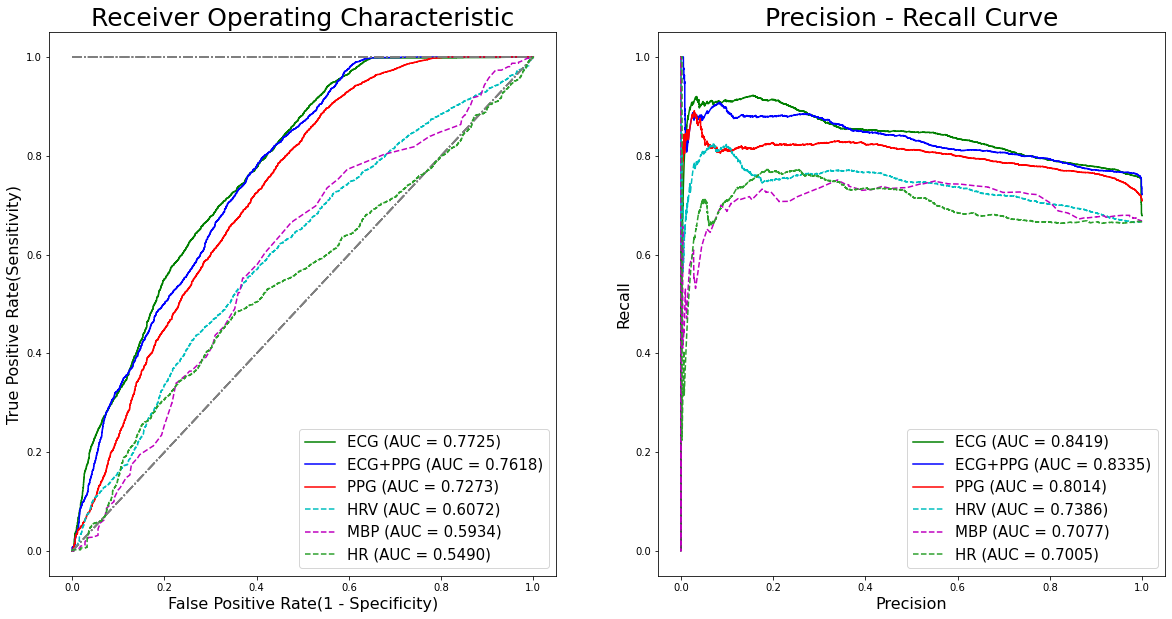

In [24]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from keras import losses, metrics
import matplotlib.pyplot as plt
from keras.models import model_from_json



#plt.rc('figure', titlesize=15)
plt.rcParams.update({'figure.titlesize':25, 'legend.fontsize': 15})

#'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
# Plotting ROC, PRC
fig = plt.figure(figsize=(20,10))
#colors = ['C0','C1','C2','C3','C4','C5']
colors = ['c','m','C2','b','g','r']
lg = ['HRV','MBP','HR','ECG+PPG','ECG','PPG']
linestyles=['--','--','--','-','-','-']
for i in [4,3,5,0,1,2]:
    w_samp_min_3 = np.ones(shape=len(yr[i]))
    w_samp_min_3[yr[i]<4] = len(yr[i])/np.sum(yr[i]<4)
    w_samp_min_3[(yr[i]>=4)&(yr[i]<7)] = len(yr[i])/np.sum((yr[i]>=4)&(yr[i]<7))
    w_samp_min_3[yr[i]>=7] = len(yr[i])/np.sum(yr[i]>=7)
    
    if i<3:
        false_positive_rate, true_positive_rate, threshold = roc_curve(ys[i], xs[i], sample_weight = w_samp_min_3)
        precision, recall, _ = precision_recall_curve(ys[i], xs[i], sample_weight = w_samp_min_3)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        prc_auc = auc(recall, precision)
        print(i,'test set AUROC:', roc_auc)
        print(i,'test set AUPRC:', prc_auc)
    else:
        load_path = loads[i-3]

        #model 부르기
        load_weight_path = load_path+'/weights.hdf5'

        print('loading model...', flush=True, end='')
        with open(load_path+"/model.json", 'r') as f_json:
            loaded_model_json = f_json.read()
        loaded_model = model_from_json(loaded_model_json)
        print('done')
        print('loading weights...', flush=True, end='')
        loaded_model.load_weights(load_weight_path)
        print('done')
        
        x_test_model = x_tests[i-3]
        y_pred = loaded_model.predict(x_test_model).flatten()
        
        false_positive_rate, true_positive_rate, threshold = roc_curve(y_bin, y_pred, sample_weight = w_samp_min_3)
        precision, recall, _ = precision_recall_curve(y_bin, y_pred, sample_weight = w_samp_min_3)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        prc_auc = auc(recall, precision)
        print(i,'test set AUROC:', roc_auc)
        print(i,'test set AUPRC:', prc_auc)        
        
    # ax1: auroc
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_title('Receiver Operating Characteristic', fontsize=25)
    ax1.set_xlabel("False Positive Rate(1 - Specificity)", fontsize=16)
    ax1.set_ylabel('True Positive Rate(Sensitivity)', fontsize=16)
    #ax1.set_xlim(0,1.05)
    #ax1.set_ylim(0,1.05)
    ax1.plot([0,1],[1,1],'C7',linestyle='dashdot') #'y:')
    ax1.plot([0,1],[0,1],'C7',linestyle='dashdot')
    ax1.plot(false_positive_rate, true_positive_rate, colors[i],linestyle=linestyles[i], label=lg[i]+' (AUC = %0.4f)'% roc_auc)
    ax1.legend(loc='best')
    #ax1.xaxis.label.set_size(16)
    #ax1.yaxis.label.set_size(16)


    # ax2: auprc
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_title('Precision - Recall Curve', fontsize=25)
    ax2.set_xlabel("Precision")
    ax2.set_ylabel('Recall')
    #ax2.set_xlim(0,1.05)
    #ax2.set_ylim(0,1.05)
    ax2.plot(recall, precision, colors[i], linestyle=linestyles[i], label=lg[i]+' (AUC = %0.4f)'% prc_auc)
    ax2.legend(loc='lower right')
    ax2.xaxis.label.set_size(16)
    ax2.yaxis.label.set_size(16)
